In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package in lpa')

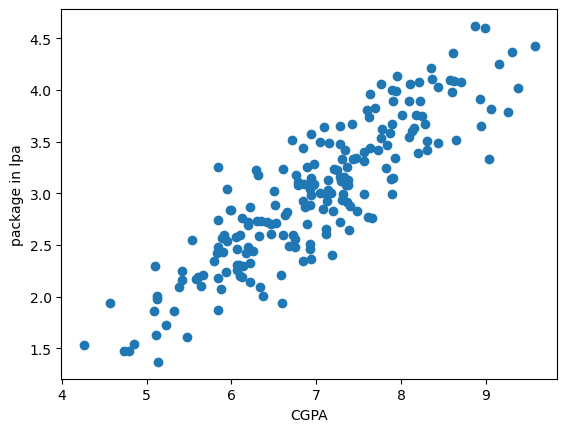

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel("package in lpa")

In [6]:
from sklearn.model_selection import train_test_split
# train test split
X = df.iloc[:,0]
y = df.iloc[:,1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1),y_train)
y_pred = lr.predict(X_test.values.reshape(-1, 1))

Text(0, 0.5, 'package in lpa')

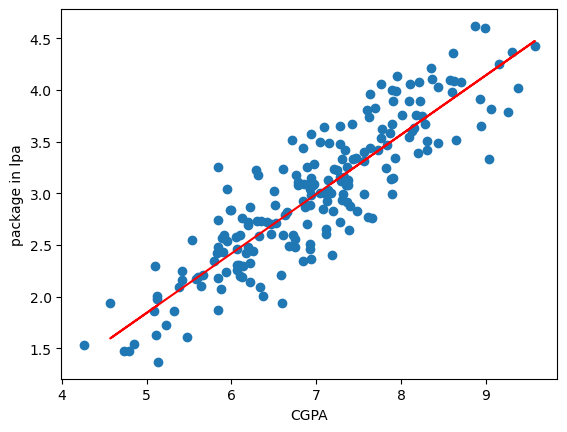

In [29]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train.values.reshape(-1, 1)),color='red')
plt.xlabel("CGPA")
plt.ylabel("package in lpa")

In [30]:
m = lr.coef_

In [31]:
b = lr.intercept_

In [32]:
# y = mx+b
# package = m * cgpa + b

m*9.40+b

array([4.37100391])

## Regression Metrics

In [34]:
# Mean Absolute Error (MAE) - loss function 

# Errors = |Actual y− Predicted y|/total

# Lower = better

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.23150985393278373

In [35]:
# Mean Squared Error (MSE) 
# Errors = |(Actual y)^2− (Predicted y)^2|/total
# Lower = better

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.08417638361329656

In [36]:
# RMSE (Root Mean Squared Error) = √ MSE

import numpy as np
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(0.2901316659954521)

In [33]:
# R² Score - This tells you how much of the variance your model explains.

# R² = 1 → perfect

# R² = 0 → model is useless

# R² < 0 → bro your model is doing WORSE than predicting the mean

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)   # “CGPA explains 77% of the differences in salary packages.”

0.7730984312051673